In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

pd.options.mode.chained_assignment = None


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 
X.head()

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [6]:
X.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [7]:
X.describe

<bound method NDFrame.describe of        price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     

In [8]:
X.dropna(subset=['peak-rpm'],axis=0)
# X.dropna(subset=['stroke'],axis=0)
X.isnull().sum()


price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [9]:
mean=X['engine-size'].mean()
X['engine-size'].replace(np.nan,mean)

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 205, dtype: int64

In [10]:
X['city-mpg']=235/X['city-mpg']

In [11]:
X.rename(columns={'city-mpg':'city-L/100L'}, inplace=True)
X.head()

,price,highway-mpg,city-L/100L,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,11.190476,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,11.190476,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,12.368421,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,9.791667,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,13.055556,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [12]:
pd.to_numeric(X['price'])
bins=np.linspace(min(X['price']),max(X['price']),4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [13]:
pd.get_dummies(X['fuel-type'])

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [14]:
X.value_counts()

price    highway-mpg  city-L/100L  peak-rpm  horsepower  compression-ratio  stroke  bore  fuel-system  engine-size  num-of-cylinders  engine-type  curb-weight  height  width  length  wheel-base  engine-location  drive-wheels  body-style   num-of-doors  aspiration  fuel-type  make           normalized-losses
5118.0   36           7.580645     4900.0    69.0        9.0                2.36    3.62  2bbl         97           4                 ohcf         2050         53.7    63.4   156.9   93.7        front            fwd           hatchback    2.0           std         gas        subaru         83.0                 1
12170.0  28           11.190476    5250.0    110.0       9.3                3.07    3.54  mpfi         121          4                 ohc          2695         56.1    66.5   186.6   99.1        front            fwd           sedan        4.0           std         gas        saab           104.0                1
11245.0  32           9.038462     4800.0    84.0        8.6   

<Axes: xlabel='drive-wheels', ylabel='price'>

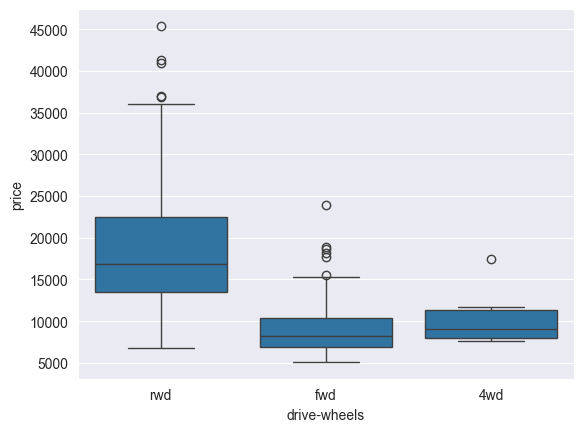

In [15]:
sns.boxplot(x=X['drive-wheels'],y=X['price'])

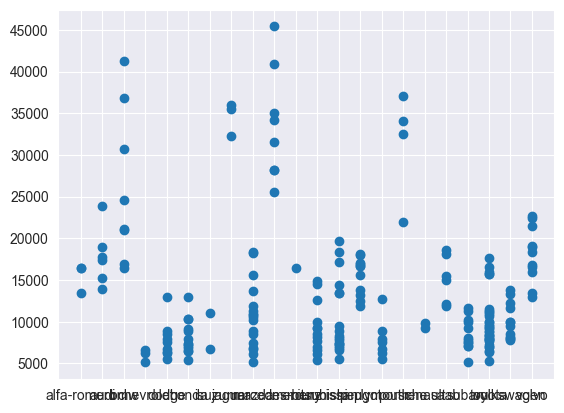

In [16]:
x=X['make']
y2=X['price']
plt.scatter(x,y2)


In [17]:
X_test=X[['drive-wheels','highway-mpg','body-style']]
X_grp=X_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
X_grp.head()

,drive-wheels,body-style,highway-mpg
0,4wd,hatchback,26.500000
1,4wd,sedan,25.333333
2,4wd,wagon,29.000000
3,fwd,convertible,29.000000
4,fwd,hardtop,37.000000


In [18]:
pivot_table=X_grp.pivot(index='drive-wheels',columns='body-style')
pivot_table

highway-mpg                                            
body-style   convertible    hardtop  hatchback      sedan      wagon
drive-wheels                                                        
4wd                  NaN        NaN  26.500000  25.333333  29.000000
fwd                 29.0  37.000000  34.795918  34.368421  31.416667
rwd                 25.4  25.857143  26.000000  25.694444  25.000000

C:\Users\sitar\AppData\Local\Temp\ipykernel_37068\360099870.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


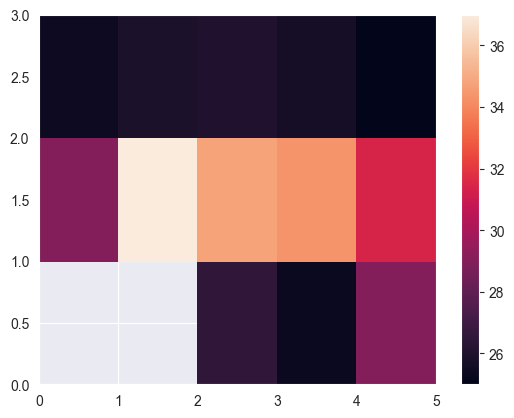

In [19]:
plt.pcolor(pivot_table)
plt.colorbar()
plt.show()

<Axes: xlabel='highway-mpg', ylabel='engine-size'>

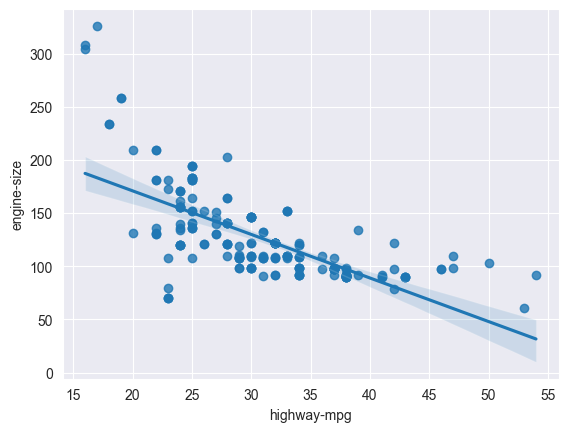

In [20]:
sns.regplot(x='highway-mpg',y='engine-size',data=X)

#these two values are highly negativly corelated

<Axes: xlabel='peak-rpm', ylabel='price'>

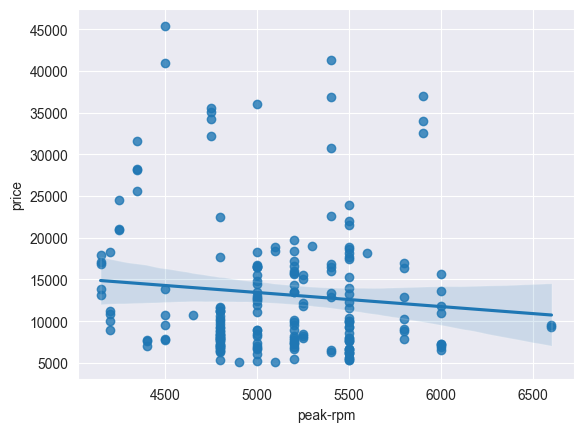

In [21]:
sns.regplot(x=X['peak-rpm'],y=X['price'],data=X)

<Axes: xlabel='horsepower', ylabel='price'>

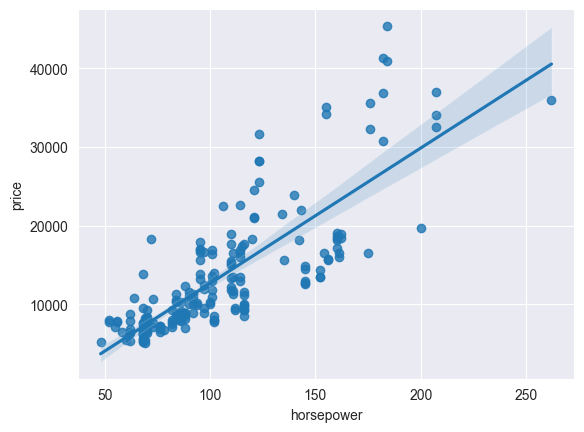

In [22]:
sns.regplot(x=X['horsepower'],y=X['price'],data=X)

<Axes: xlabel='engine-size', ylabel='price'>

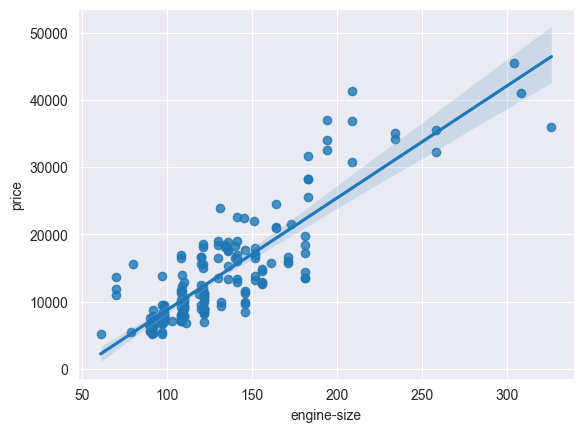

In [23]:
sns.regplot(x=X['engine-size'],y=X['price'],data=X)

In [24]:
#using pearson's corelation we can 
pearson,p_value=stats.pearsonr(X['horsepower'],X['price'])
pearson2,p_value2=stats.pearsonr(X['peak-rpm'],X['price'])
pearson3,p_value3=stats.pearsonr(X['highway-mpg'],X['engine-size'])
print(pearson,p_value)
print(pearson2,p_value2)
print(pearson3,p_value3)


ValueError: array must not contain infs or NaNs